<a href="https://colab.research.google.com/github/AlexSoldatov/Study-Data-Analysis/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домошнее задание №1


Подготовка данных

In [5]:
# Импорт необходимых библиотек
from tensorflow.keras.datasets import mnist # импорт базы изображений
from tensorflow.keras.models import Sequential # импорт конструктора 
from tensorflow.keras.layers import Dense # импорт полносвязного слоя
from tensorflow.keras.optimizers import Adam # импорт оптимизатора Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # импорт для отрисовки изображения
import numpy as np #  импорт библтотеки nimpy
import pylab # импорт библиотеки для построения графиков
from mpl_toolkits.mplot3d import Axes3D # импорт библиотеки для построения 3D графиков
from google.colab import files # импорт файловых функций для загрузки своей картинки
import matplotlib.pyplot as plt # импорт библиотеки отрисовки (для графиков)
from PIL import Image # импорт библиотеки для отрисовки изображений
# Отрисовка изображений в блокноте
%matplotlib inline 



In [6]:
# Загружаем данные Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
x_train_org.shape

(60000, 28, 28)

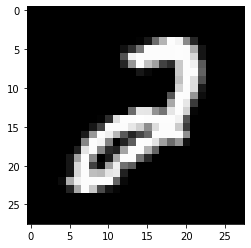

In [24]:
# Номер изображения
n = 555
# отрисовка картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))
# вывод картинки
plt.show()

In [25]:
y_train_org[n]

2

In [21]:
# меняем размерность матриц с 28х28 на 748х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
# выводим 
print(x_train_org.shape)
print(x_train.shape)
print(x_test_org.shape)
print(x_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 28, 28)
(10000, 784)


In [ ]:
# Нормализуем входные изображения
# Преобразуем тип - в цифры с плавающий точкой
x_train = x_train.astype('float32')
# Нормализуем ( в данном случае делим на 255) для приведения диапазона к виду 0-1
x_train = x_train / 255

In [22]:
y_train_org[0]

5

In [26]:
# Преобразование ответов к виду one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [27]:
# Выводим размер y_train и y_test
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [28]:
# Вывод одного вектора
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [30]:
print(y_train_org.shape)

(60000,)


Добавляем свое изображение


In [42]:
# Добавляем свое изображение
my_pic = image.load_img('dz-0-1.jpg', target_size=(28, 28), color_mode = ‘grayscale’)

SyntaxError: ignored

In [ ]:
# Нормализуем свое изображение


# преобразуем изображение в numpy-массив


# Выполняем инверсию цветов, нормирование и решейп массива

Создаем нейронку

In [32]:
# Создаем каркас сети прямого распространения
model = Sequential()
# Добавляем полносвязный слой 800 нейронов, активация "relu"
model.add(Dense(800, input_dim=784, activation="relu"))
# Добавляем полносвязный слой на 400 нейронов, активация "relu"
model.add(Dense(400, activation="relu"))
#Добавляем полносвязный слой 10 нейронов, активация "softmax"
model.add(Dense(10, activation="softmax"))

In [34]:
# Компилируем модель
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Выводим структуры модели
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# Обучаем нейронку
model.fit(x_train, y_train, batch_size=128, epochs=13, verbose=1)

Epoch 1/13
469/469 [==============================] - 8s 17ms/step - loss: 0.0224 - accuracy: 0.9947
Epoch 2/13
469/469 [==============================] - 8s 17ms/step - loss: 0.0378 - accuracy: 0.9930
Epoch 3/13
469/469 [==============================] - 8s 17ms/step - loss: 0.0487 - accuracy: 0.9909
Epoch 4/13
469/469 [==============================] - 8s 17ms/step - loss: 0.0307 - accuracy: 0.9934
Epoch 5/13
469/469 [==============================] - 8s 16ms/step - loss: 0.0410 - accuracy: 0.9926
Epoch 6/13
469/469 [==============================] - 8s 17ms/step - loss: 0.0322 - accuracy: 0.9944
Epoch 7/13
469/469 [==============================] - 8s 16ms/step - loss: 0.0342 - accuracy: 0.9938
Epoch 8/13
469/469 [==============================] - 8s 16ms/step - loss: 0.0350 - accuracy: 0.9944
Epoch 9/13
469/469 [==============================] - 8s 16ms/step - loss: 0.0297 - accuracy: 0.9944
Epoch 10/13
469/469 [==============================] - 8s 17ms/step - loss: 0.0284 - accura

In [39]:
# Сохраняем модель и загружаем ее
model.save_weights('model-dz-1.h5')
model.load_weights('model-dz-1.h5')